## Packages -> semTools
- install.packages('semTools')

In [2]:
library(semTools)

Carregando pacotes exigidos: lavaan

This is lavaan 0.6-17
lavaan is FREE software! Please report any bugs.

 

###############################################################################

This is semTools 0.5-6

All users of R (or SEM) are invited to submit functions or ideas for functions.

###############################################################################



## Medidas de Centralidade e Variablidade
- mean() -> Retorna a média
- median() -> Retorna a mediana
- quantile() -> Retorna quartis | Selecione um quartil específico pelo seu indice
- sd() -> Retorna o desvio padrão
- summary() -> Retorna um resumo geral

In [3]:
salario_jogadores = c(
    40000, 18000, 12000, 250000, 30000, 140000, 300000, 40000, 800000
)
media = mean(salario_jogadores)
mediana = median(salario_jogadores)
quartis = quantile(salario_jogadores)
quartil3 = quartis[4]
desv = sd(salario_jogadores)
resumo = summary(salario_jogadores)

salario_jogadores
media
mediana
quartis
quartil3
desv
resumo

[1]  40000  18000  12000 250000  30000 140000 300000  40000 800000

[1] 181111.1

[1] 40000

0%    25%    50%    75%   100% 
 12000  30000  40000 250000 800000

75% 
250000

[1] 255307.9

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12000   30000   40000  181111  250000  800000 

## Teroema Central do Limite
### A média de dados não distribuidos normalmente, deverá ser normalmente distribuida

## Package semTools
- Criamos o vetor z para armazenar as médias.
- Criamos dados aleatórios para cada indice do vetor z
- Armazenamos as médias no vetor z
- Criamos um gráfico com apenas os 3 primeiros elementos de z (NÃO distribuido NORMALMENTE)
- Criamos um gráfico com todas as média em z (Distribuido NORMALMENTE)

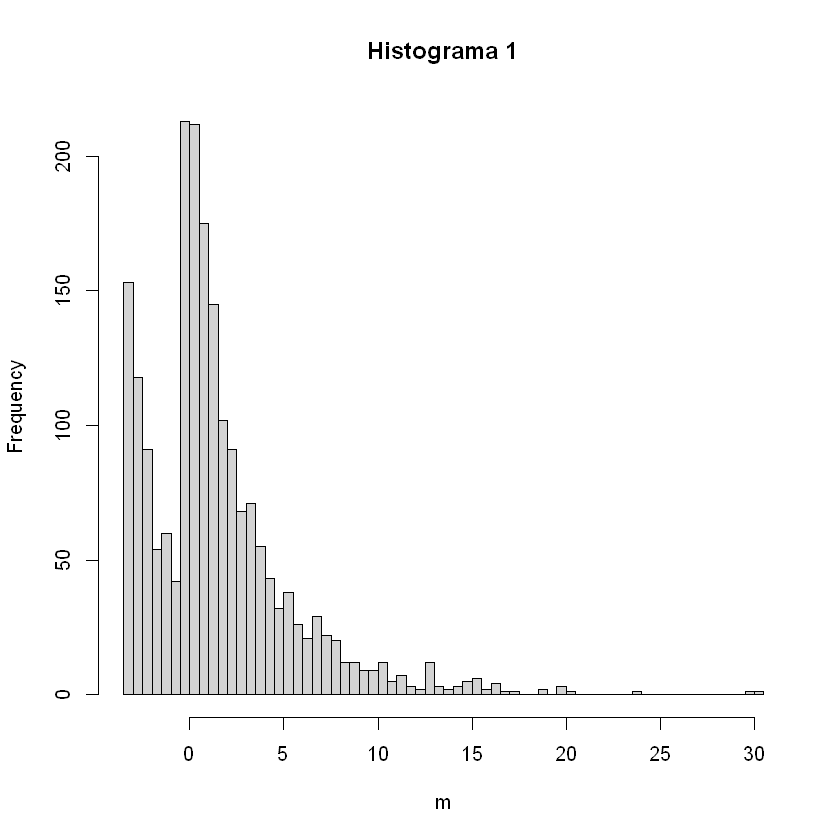

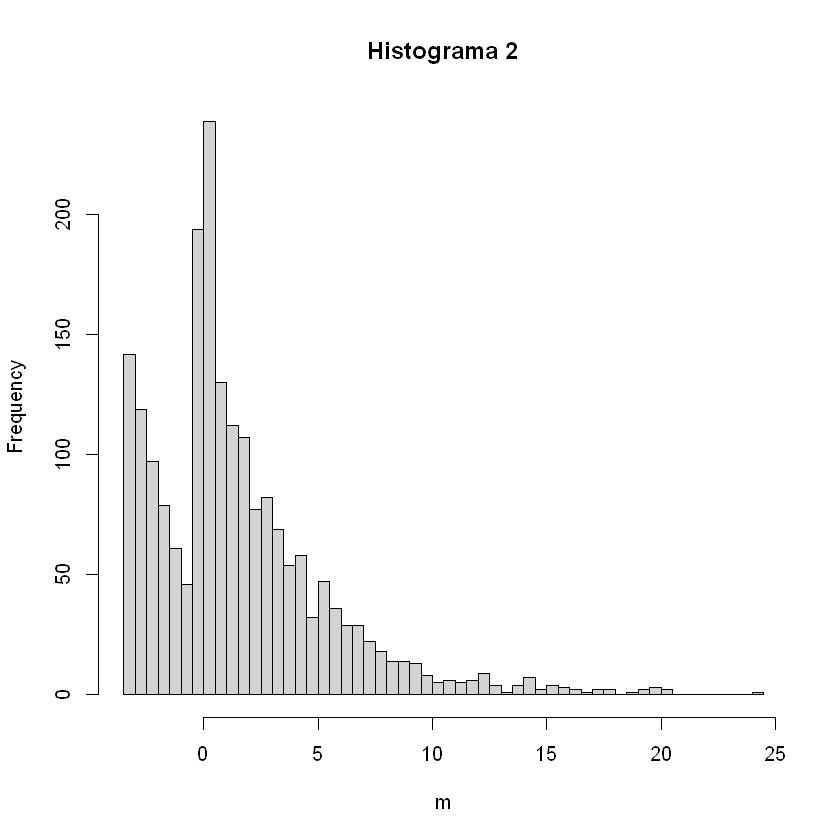

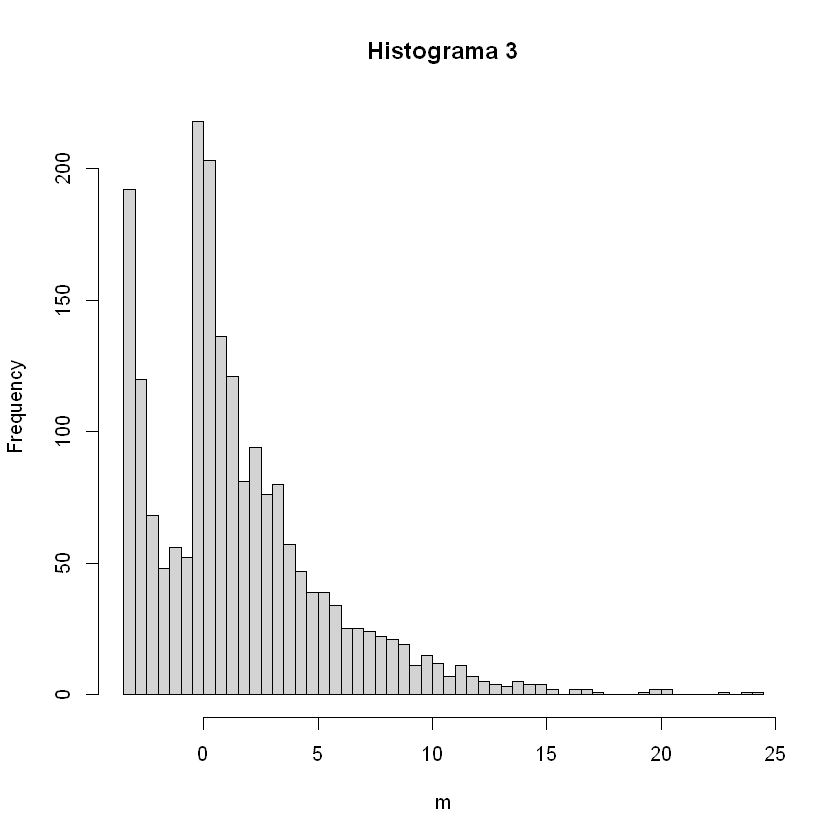

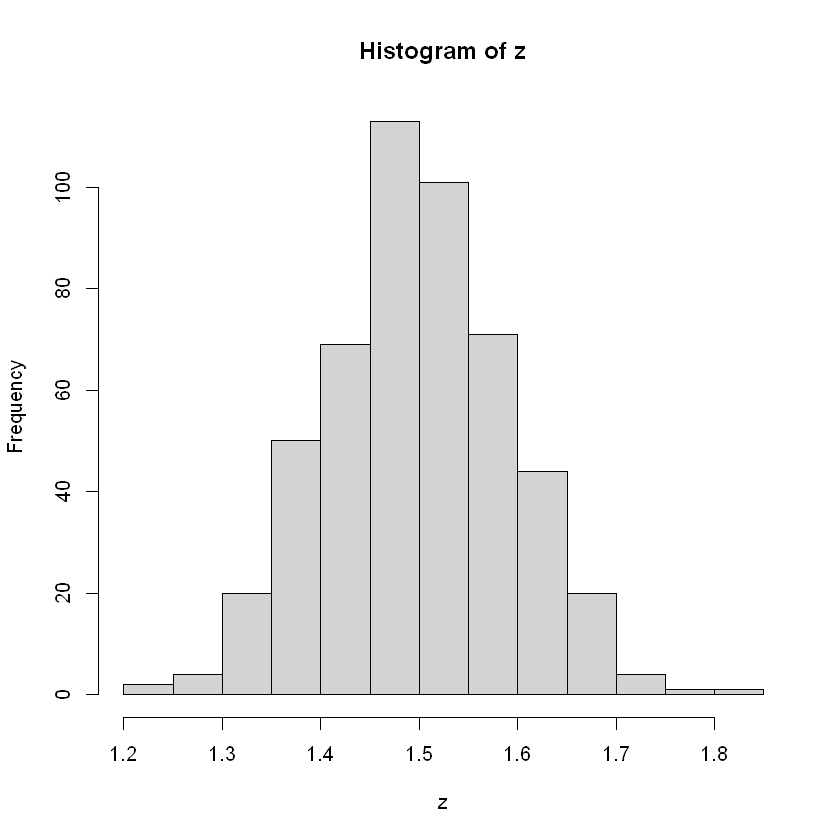

In [4]:
z = rep(0, 500)
for (i in 1:500) {
    m = mvrnonnorm(
        1000, c(1, 2), matrix(c(10, 2, 2, 5), 2, 2),
        skewness=c(5, 2), kurtosis=c(3, 3)
    )

    z[i] = mean(m)

    if (i < 4) {
        hist(m, breaks=50, main=paste0('Histograma ', i))
    }
}

hist(z)

## Testes de Normalidade
- set.seed() -> Semente para resultados iguais
- rnorm() -> Gera variaveis normalmente distribuidas
- qqnorm() -> Gera um gráfico da distribuição das variaveis
- qqline() -> gera uma linha indicativa da normalidade entre variaveis

## Q-Q plot
### qqnorm() | qqline()

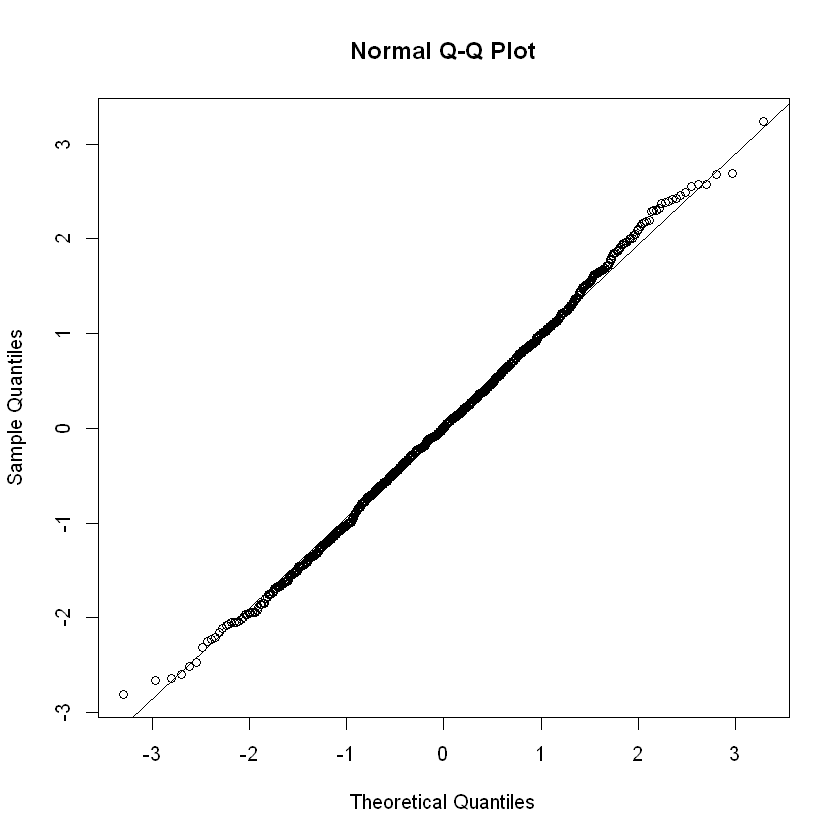

In [5]:
set.seed(123)
x = rnorm(1000)
qqnorm(x)
qqline(x)

## Shapiro-Wilk
- shapiro.test() -> Retorna resultado do teste shapiro-wilk
- p-value > 0.05 -> Hipótese NULA = Dados normalmente distribuidos

In [6]:
shapiro.test(x)


	Shapiro-Wilk normality test

data:  x
W = 0.99838, p-value = 0.4765


## Histograma com Densidade

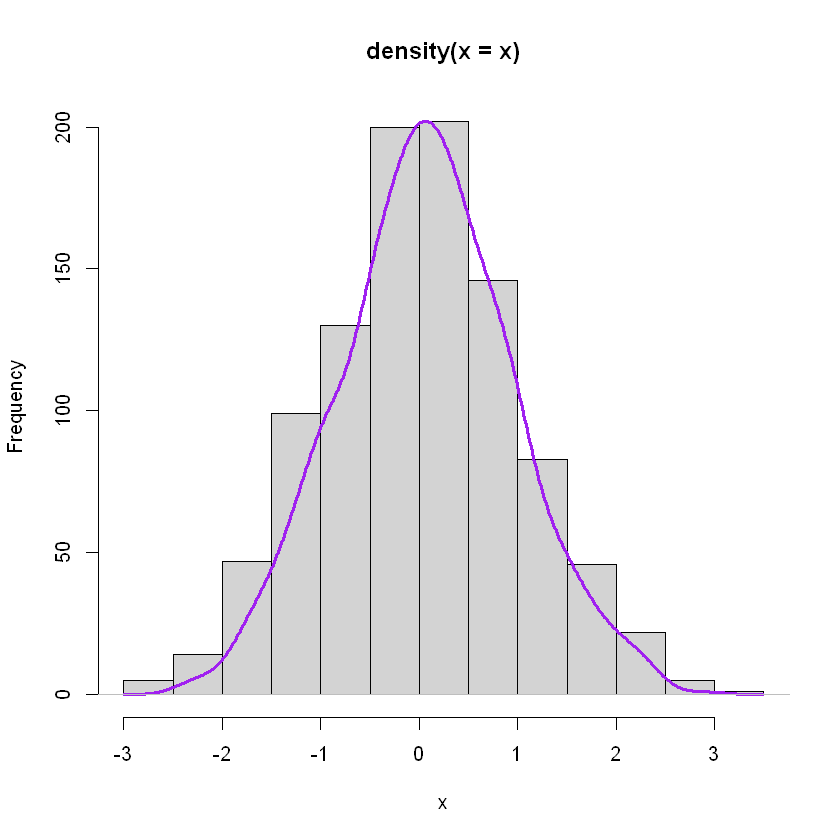

In [7]:
hist(x, main='')
par(new=T)
plot(density(x), xlab='', ylab='', axes=F, lwd=2.5, col='purple')

## Dados NÃO NORMALMENTE distribuidos


	Shapiro-Wilk normality test

data:  m
W = 0.8857, p-value < 2.2e-16


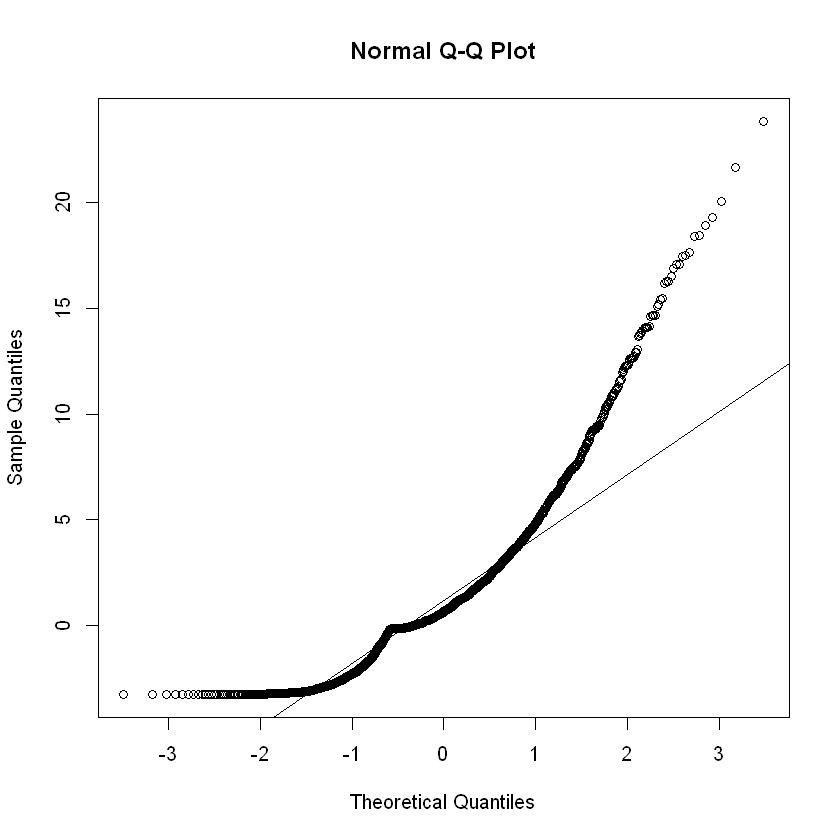

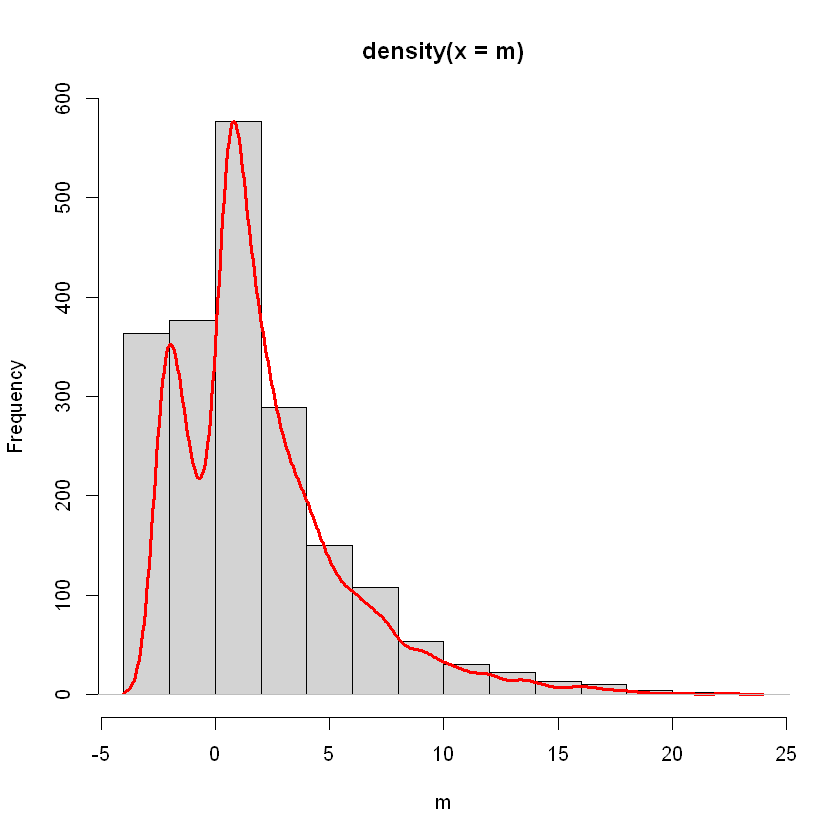

In [8]:
m = mvrnonnorm(
    1000, c(1, 2), matrix(c(10, 2, 2, 5), 2, 2),
    skewness=c(5, 2), kurtosis=c(3, 3)
)
qqnorm(m)
qqline(m)
shapiro.test(m)
hist(m, main='')
par(new=T)
plot(density(m), xlab='', ylab='', axes=F, lwd=2.5, col='red')

## Médias a Longo Prazo
- Médias fidedignas se estabelem a longo prazo. Com amostragens MAIORES!

In [33]:
x = sample(1:6, 6, replace = T)
y = sample(1:6, 10000, replace = T)
mean(x)
mean(y)

[1] 2

[1] 3.4977